# import, data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
COLUMNS = ["user_id" ,"trip", "course", "place_id","place_name", "place_category","rating", "review", "place_address", "place_lat", "place_lng","y", "belief", "y_pred"]

In [4]:
data_0 = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_couple_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_family_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_family_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_hotel_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_hotel_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_guesthouse_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_guesthouse_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_pension_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_pension_after.csv', names = COLUMNS, header=None, skiprows = 1)

In [5]:
data_couple_after = data_0.fillna(data_0['place_lat'].mean())
data_couple_after.loc[221]

user_id                     446
trip                     couple
course                        6
place_id                   2508
place_name            1.5닭갈비 본점
place_category              닭요리
rating                        4
review                      171
place_address     강원 춘천시 후만로 77
place_lat               37.8763
place_lng               127.753
y                             0
belief                     -135
y_pred                 5.98e-11
Name: 221, dtype: object

In [6]:
data_couple_after

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
0,649,couple,1,2753,38마일,디저트카페,3.8,4,강원 춘천시 남산면 종자리로 42,37.745248,127.712175,0,-135,1.880000e-12
1,649,couple,4,2508,1.5닭갈비 본점,닭요리,4.0,171,강원 춘천시 후만로 77,37.876336,127.753077,0,-135,8.460000e-13
2,649,couple,10,2566,LDH맥반석문어숯불닭갈비,닭요리,4.5,33,강원 춘천시 남산면 강촌구곡길 9 1층,37.802923,127.624128,0,-65,3.080000e-13
3,649,couple,4,593,9남매집,두부전문점,4.6,85,강원 강릉시 초당원길 63-2,37.786889,128.913850,0,-90,6.660000e-14
4,649,couple,3,2119,가락재,고개,0.0,0,강원 춘천시 동면 상걸리 산 5-7,37.855355,127.866415,0,-10,5.910000e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,596,couple,9,2508,1.5닭갈비 본점,닭요리,4.0,171,강원 춘천시 후만로 77,37.876336,127.753077,0,-135,3.870000e-09
246,596,couple,2,2753,38마일,디저트카페,3.8,4,강원 춘천시 남산면 종자리로 42,37.745248,127.712175,0,-135,5.400000e-11
247,596,couple,3,2994,24시전주명가콩나물국밥 장학점,국밥,5.0,2,강원 춘천시 동면 춘천로 451,37.895824,127.760379,0,-45,3.260000e-11
248,596,couple,5,2119,가락재,고개,0.0,0,강원 춘천시 동면 상걸리 산 5-7,37.855355,127.866415,0,-10,5.210000e-13


# MAP 함수

In [9]:
def MAP_List(data):
  MAP_li = np.zeros(shape=50)
  for i in range(50):
    test_r = data[i*5:i*5+5]
    test_r['preference'] = 0
    rating_list = test_r['rating'].values
    rating_mean = sum(rating_list)/len(rating_list)
    test_r.loc[test_r.rating>rating_mean, 'preference'] = 1
    preference_list = test_r['preference'].values
    MAP = 0 
    n = 0
    for j in range(5):
      if (preference_list[j] == 1):
        n = n + 1
        MAP =(n/(j+1)) + MAP 
    if n == 0:
      MAP_li[i] = 0
    if n != 0:
      MAP_li[i] = MAP/n 
  return MAP_li

# MAP 구하기

In [10]:
MAP_li_couple = MAP_List(data_couple_after)
MAP_li_family = MAP_List(data_family_after)
MAP_li_hotel = MAP_List(data_hotel_after)
MAP_li_guesthouse = MAP_List(data_guesthouse_after)
MAP_li_pension = MAP_List(data_pension_after)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [11]:
total_MAP_list = np.zeros(shape=5)

total_MAP_list[0] = sum(MAP_li_couple)/len(MAP_li_couple)
total_MAP_list[1] = sum(MAP_li_family)/len(MAP_li_family)
total_MAP_list[2] = sum(MAP_li_hotel)/len(MAP_li_hotel)
total_MAP_list[3] = sum(MAP_li_guesthouse)/len(MAP_li_guesthouse)
total_MAP_list[4] = sum(MAP_li_pension)/len(MAP_li_pension)

total_MAP = sum(total_MAP_list)/len(total_MAP_list)
print(total_MAP)

0.7220555555555557


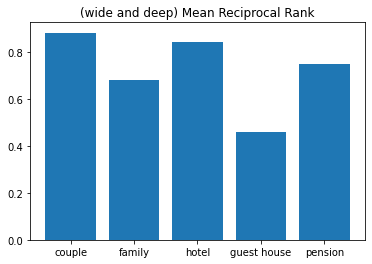

In [12]:
x_axis = ['couple', 'family', 'hotel', 'guest house', 'pension']
plt.bar(x_axis,total_MAP_list)
plt.title('(wide and deep) Mean Average Precision')
plt.show()

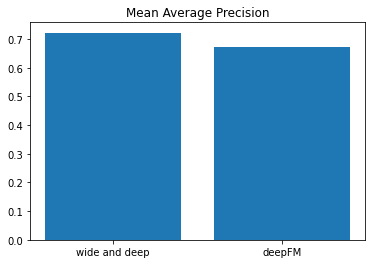

In [13]:
y_axis = [0.7220555555555557, 0.6729277777777776]
x_axis = ['wide and deep', 'deepFM']
plt.bar(x_axis,y_axis)
plt.title('Mean Average Precision')
plt.show()